<a href="https://colab.research.google.com/github/cherlhee/AI/blob/master/ai_welding_1st_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬을 이용하여 학습, 검증, 테스트 데이터 결과 확인하기

## kiseung, welding modeling(분류)

to load to multiple columns;

including zig column

to change t to y and y_pred

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras import metrics
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [ ]:
# to clone data from github;
!git clone https://github.com/cherlhee/AI.git

fatal: destination path 'AI' already exists and is not an empty directory.


In [ ]:
# df = pd.read_csv('./AI/welding-data-dnn.csv')
# df

df = pd.read_csv('./AI/20230503-r1-tbl.csv')
df

,label,num,vtg1,vtg2,vtg3,vtg4,vtg5,vtg6,vtg7,vtg8,...,crt1,crt2,crt3,crt4,crt5,crt6,crt7,crt8,crt9,Unnamed: 21
0,0,1,13.7,13.7,13.7,13.1,13.1,13.1,13.1,13.2,...,173.3,173.3,173.3,177.5,175.8,175.8,175.8,173.7,NaN,NaN
1,0,2,15.2,15.2,15.2,13.1,13.1,13.6,13.6,13.6,...,168.3,168.3,168.3,177.9,174.5,175.0,175.0,175.0,NaN,NaN
2,1,3,13.6,13.6,13.1,13.0,13.1,13.1,NaN,NaN,...,175.4,175.4,175.0,175.8,175.8,174.1,NaN,NaN,NaN,NaN
3,1,4,13.2,13.1,13.1,13.4,13.3,13.2,13.4,13.4,...,173.3,174.5,173.7,173.7,173.7,175.0,130.8,130.8,130.8,NaN
4,1,5,13.2,13.1,13.3,13.3,13.5,13.1,13.2,NaN,...,173.3,174.5,172.9,173.3,175.4,175.4,155.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,78,13.8,13.8,13.2,13.2,13.2,13.2,13.2,13.2,...,170.8,170.8,173.3,172.9,172.9,176.6,176.6,176.6,NaN,NaN
78,1,79,13.6,13.6,13.6,13.1,13.0,13.3,13.3,13.2,...,170.8,170.8,170.8,174.1,171.6,176.2,174.1,175.0,NaN,NaN
79,1,80,14.8,14.0,14.0,13.2,13.2,13.2,13.2,13.4,...,156.6,173.7,173.7,175.0,172.0,172.0,172.0,175.8,NaN,NaN
80,0,81,13.4,13.1,13.1,13.5,13.8,13.2,12.9,13.3,...,172.5,173.3,173.3,172.9,172.9,173.7,176.2,127.0,NaN,NaN


In [ ]:
df = df.fillna(df.mean())
df

,label,num,vtg1,vtg2,vtg3,vtg4,vtg5,vtg6,vtg7,vtg8,...,crt1,crt2,crt3,crt4,crt5,crt6,crt7,crt8,crt9,Unnamed: 21
0,0,1,13.7,13.7,13.7,13.1,13.1,13.1,13.100000,13.200,...,173.3,173.3,173.3,177.5,175.8,175.8,175.800000,173.700000,163.711111,141.6
1,0,2,15.2,15.2,15.2,13.1,13.1,13.6,13.600000,13.600,...,168.3,168.3,168.3,177.9,174.5,175.0,175.000000,175.000000,163.711111,141.6
2,1,3,13.6,13.6,13.1,13.0,13.1,13.1,13.212676,13.225,...,175.4,175.4,175.0,175.8,175.8,174.1,166.728169,165.963889,163.711111,141.6
3,1,4,13.2,13.1,13.1,13.4,13.3,13.2,13.400000,13.400,...,173.3,174.5,173.7,173.7,173.7,175.0,130.800000,130.800000,130.800000,141.6
4,1,5,13.2,13.1,13.3,13.3,13.5,13.1,13.200000,13.225,...,173.3,174.5,172.9,173.3,175.4,175.4,155.000000,165.963889,163.711111,141.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,78,13.8,13.8,13.2,13.2,13.2,13.2,13.200000,13.200,...,170.8,170.8,173.3,172.9,172.9,176.6,176.600000,176.600000,163.711111,141.6
78,1,79,13.6,13.6,13.6,13.1,13.0,13.3,13.300000,13.200,...,170.8,170.8,170.8,174.1,171.6,176.2,174.100000,175.000000,163.711111,141.6
79,1,80,14.8,14.0,14.0,13.2,13.2,13.2,13.200000,13.400,...,156.6,173.7,173.7,175.0,172.0,172.0,172.000000,175.800000,163.711111,141.6
80,0,81,13.4,13.1,13.1,13.5,13.8,13.2,12.900000,13.300,...,172.5,173.3,173.3,172.9,172.9,173.7,176.200000,127.000000,163.711111,141.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   label        82 non-null     int64  
 1   num          82 non-null     int64  
 2   vtg1         82 non-null     float64
 3   vtg2         82 non-null     float64
 4   vtg3         82 non-null     float64
 5   vtg4         82 non-null     float64
 6   vtg5         82 non-null     float64
 7   vtg6         82 non-null     float64
 8   vtg7         82 non-null     float64
 9   vtg8         82 non-null     float64
 10  vtg9         82 non-null     float64
 11  vtg10        82 non-null     float64
 12  crt1         82 non-null     float64
 13  crt2         82 non-null     float64
 14  crt3         82 non-null     float64
 15  crt4         82 non-null     float64
 16  crt5         82 non-null     float64
 17  crt6         82 non-null     float64
 18  crt7         82 non-null     float64
 19  crt8      

In [ ]:
df.corr()

,label,num,vtg1,vtg2,vtg3,vtg4,vtg5,vtg6,vtg7,vtg8,...,crt1,crt2,crt3,crt4,crt5,crt6,crt7,crt8,crt9,Unnamed: 21
label,1.000000,0.023707,0.060829,-0.130701,-0.168733,-0.008614,0.143869,0.112085,-0.029913,-0.221157,...,0.025263,0.168468,0.090039,0.074022,0.080603,0.078267,-0.195549,-0.094966,-0.099551,NaN
num,0.023707,1.000000,0.022009,-0.076814,-0.132714,-0.128338,0.107934,0.041205,0.073909,-0.032905,...,-0.136786,-0.046650,0.093455,-0.015941,-0.085931,-0.050423,0.145103,-0.055866,0.050695,NaN
vtg1,0.060829,0.022009,1.000000,0.413609,0.329672,0.102653,0.199437,0.025206,0.321731,-0.091038,...,-0.601336,-0.315920,-0.254430,0.108393,0.070751,0.062005,0.173286,-0.236149,-0.034960,NaN
vtg2,-0.130701,-0.076814,0.413609,1.000000,0.854835,0.531265,0.103026,0.032801,0.375942,0.356824,...,-0.359133,-0.576449,-0.610779,-0.189092,0.044415,0.095788,0.181944,0.285011,0.076405,NaN
vtg3,-0.168733,-0.132714,0.329672,0.854835,1.000000,0.623053,0.012560,0.020544,0.295218,0.379886,...,-0.362755,-0.523895,-0.645089,-0.216869,0.008418,0.204520,0.132795,0.263341,0.134730,NaN
vtg4,-0.008614,-0.128338,0.102653,0.531265,0.623053,1.000000,0.156892,-0.016535,0.158926,0.170319,...,-0.066845,-0.250244,-0.384197,-0.484501,0.024774,0.155365,0.008841,0.058038,0.076290,NaN
vtg5,0.143869,0.107934,0.199437,0.103026,0.012560,0.156892,1.000000,0.324541,0.242708,-0.091729,...,-0.086328,0.055713,0.166400,0.091175,-0.025436,0.104923,-0.009740,-0.193517,-0.100942,NaN
vtg6,0.112085,0.041205,0.025206,0.032801,0.020544,-0.016535,0.324541,1.000000,0.157492,0.023643,...,0.076507,0.099907,0.145670,0.223576,-0.171218,-0.128069,-0.034307,-0.026763,-0.030054,NaN
vtg7,-0.029913,0.073909,0.321731,0.375942,0.295218,0.158926,0.242708,0.157492,1.000000,0.160554,...,-0.148905,-0.147040,-0.216787,-0.030724,-0.023473,0.011633,-0.101278,-0.166791,-0.113836,NaN
vtg8,-0.221157,-0.032905,-0.091038,0.356824,0.379886,0.170319,-0.091729,0.023643,0.160554,1.000000,...,-0.099150,-0.261690,-0.178570,0.102416,-0.053240,0.018389,-0.050878,0.174266,-0.273425,NaN


In [ ]:
# x = df[['vtg1','vtg2','vtg3','vtg4', 'crt1','crt2','crt3', 'crt4', 'crt6','crt7','crt8']]
x = df[['vtg2','vtg3','vtg5','vtg6','vtg8', 'crt2','crt3','crt7', 'crt8', 'crt9']]
x

# x = df.drop(['label','num'], axis=1)
# x


,vtg2,vtg3,vtg5,vtg6,vtg8,crt2,crt3,crt7,crt8,crt9
0,13.7,13.7,13.1,13.1,13.200,173.3,173.3,175.800000,173.700000,163.711111
1,15.2,15.2,13.1,13.6,13.600,168.3,168.3,175.000000,175.000000,163.711111
2,13.6,13.1,13.1,13.1,13.225,175.4,175.0,166.728169,165.963889,163.711111
3,13.1,13.1,13.3,13.2,13.400,174.5,173.7,130.800000,130.800000,130.800000
4,13.1,13.3,13.5,13.1,13.225,174.5,172.9,155.000000,165.963889,163.711111
...,...,...,...,...,...,...,...,...,...,...
77,13.8,13.2,13.2,13.2,13.200,170.8,173.3,176.600000,176.600000,163.711111
78,13.6,13.6,13.0,13.3,13.200,170.8,170.8,174.100000,175.000000,163.711111
79,14.0,14.0,13.2,13.2,13.400,173.7,173.7,172.000000,175.800000,163.711111
80,13.1,13.1,13.8,13.2,13.300,173.3,173.3,176.200000,127.000000,163.711111


In [ ]:
# t = df.iloc[:,-1]
# t

y = df.loc[:,'label']
y

0     0
1     0
2     1
3     1
4     1
     ..
77    0
78    1
79    1
80    0
81    1
Name: label, Length: 82, dtype: int64

In [ ]:
# # xy = np.loadtxt('./data_laser_2.csv', delimiter=',', dtype=np.float32)

# # 가장 마지막 column이 분류, 나머지는 Input 변수
# x_data = xy[:, 0:-1]
# x_org = copy.deepcopy(x_data)
# print('x;', x_data)


# y_data = xy[:, [-1]]

# print('y;', y_data)

In [ ]:
# to make normal distribution of xdata;
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
print('x;', x)




x; [[ 4.22933108e-01  5.86499067e-01 -5.59278995e-01 -2.41795931e-01
  -2.06017145e-01 -1.88837454e-01 -3.16849148e-01  6.16274225e-01
   6.70324724e-01 -5.56364588e-15]
 [ 3.17535493e+00  3.47207448e+00 -5.59278995e-01  4.11706585e-01
   3.09025718e+00 -2.09581667e+00 -2.51868221e+00  5.61928043e-01
   7.82968160e-01 -5.56364588e-15]
 [ 2.39438321e-01 -5.67731097e-01 -5.59278995e-01 -2.41795931e-01
   1.46383986e-14  6.12093818e-01  4.31774094e-01  0.00000000e+00
   0.00000000e+00 -5.56364588e-15]
 [-6.78035618e-01 -5.67731097e-01  3.31223483e-01 -1.11095428e-01
   1.44212002e+00  2.68837558e-01 -1.40702503e-01 -2.44069853e+00
  -3.04690868e+00 -6.44246147e+00]
 [-6.78035618e-01 -1.82987709e-01  1.22172596e+00 -2.41795931e-01
   1.46383986e-14  2.68837558e-01 -4.92995794e-01 -7.96726514e-01
   0.00000000e+00 -5.56364588e-15]
 [ 2.39438321e-01 -5.67731097e-01 -1.14027756e-01  1.96050755e-02
   6.18051436e-01 -4.93954130e-01  9.60214029e-01  6.16274225e-01
   7.04984243e-01 -5.56364588e

In [ ]:
# split data: Training data를 70%
x_train, x_test, y_train, y_test = train_test_split(x, y,
				       train_size=0.70, random_state=42)

# split data: Validation과 Test data를 50:50 으로
# x_val, x_test, t_val, t_test = train_test_split(x_test, t_test,
# 				       train_size=0.50, random_state=42)

In [ ]:

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
# model.add(Dense(1, activation='sigmoid'))



#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=40, batch_size=5)
# history = model.fit(x_train, t_train, epochs=200, batch_size=10, validation_data=(x_val, t_val))

Epoch 1/40
12/12 [==============================] - 1s 2ms/step - loss: 0.6881 - accuracy: 0.5614
Epoch 2/40
12/12 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.7368
Epoch 3/40
12/12 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7719
Epoch 4/40
12/12 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.8246
Epoch 5/40
12/12 [==============================] - 0s 3ms/step - loss: 0.5416 - accuracy: 0.8246
Epoch 6/40
12/12 [==============================] - 0s 2ms/step - loss: 0.5283 - accuracy: 0.8421
Epoch 7/40
12/12 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.8596
Epoch 8/40
12/12 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8596
Epoch 9/40
12/12 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8596
Epoch 10/40
12/12 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8421
Epoch 11/40
12/12 [

In [ ]:
print('df.shape;', df.shape)

df2 = df
df2.shape

df.shape; (82, 22)


(82, 22)

In [ ]:
# df2.columns = ['upper','lower', 'speed','focus','location']
# Index(['#1. Strength of upper sheet', '#2. Strength of lower sheet',
#        '#3. Welding speed', '#4. Focal position',
#        '#6. Fracture location (0: BM 1: HAZ 2: FZ)'],
#       dtype='object')
df2.columns
# for i in range(len(t)):
#     print(x[i,:], t[i,:], model.predict(x)[i])

Index(['label', 'num', 'vtg1', 'vtg2', 'vtg3', 'vtg4', 'vtg5', 'vtg6', 'vtg7',
       'vtg8', 'vtg9', 'vtg10', 'crt1', 'crt2', 'crt3', 'crt4', 'crt5', 'crt6',
       'crt7', 'crt8', 'crt9', 'Unnamed: 21'],
      dtype='object')

In [ ]:
# to predict
y_pred = model.predict(x_test)
print(y_pred[:10])
print(y_test[:10])



1/1 [==============================] - 0s 44ms/step
[[0.25945216 0.7405479 ]
 [0.7409641  0.25903583]
 [0.07167235 0.9283277 ]
 [0.41911033 0.5808896 ]
 [0.20585078 0.7941492 ]
 [0.4783168  0.52168316]
 [0.7587576  0.24124244]
 [0.17707253 0.82292736]
 [0.30413604 0.69586396]
 [0.9893516  0.01064839]]
30    1
0     0
22    1
31    1
18    0
28    0
10    0
53    0
4     1
12    0
Name: label, dtype: int64


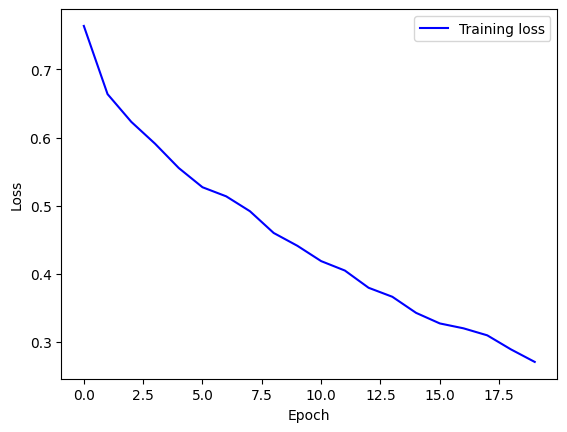

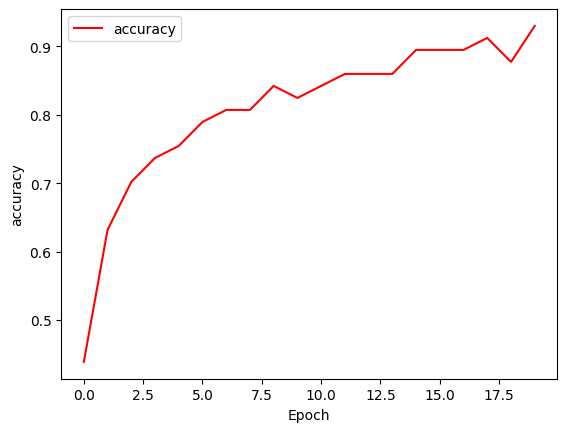

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']


plt.plot(loss, 'b', label='Training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


plt.plot(acc, 'r', label='accuracy')

# plt.plot(history.history['val_loss'], 'b', label='Validation loss')
# plt.title('Training and validation loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('accuracy; ', accuracy)
print('loss; ', loss)

1/1 [==============================] - 0s 93ms/step - loss: 1.0643 - accuracy: 0.5200
accuracy;  0.5199999809265137
loss;  1.064318060874939


In [ ]:
# to save model and reuse it;

model.save('./mymodel.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('./mymodel.hdf5')

In [ ]:
# to predict
y_pred = model.predict(x_test)
print(y_pred[:10])
print(y_test[:10])

1/1 [==============================] - 0s 38ms/step
[[0.25945216 0.7405479 ]
 [0.7409641  0.25903583]
 [0.07167235 0.9283277 ]
 [0.41911033 0.5808896 ]
 [0.20585078 0.7941492 ]
 [0.4783168  0.52168316]
 [0.7587576  0.24124244]
 [0.17707253 0.82292736]
 [0.30413604 0.69586396]
 [0.9893516  0.01064839]]
30    1
0     0
22    1
31    1
18    0
28    0
10    0
53    0
4     1
12    0
Name: label, dtype: int64


to calculate f1 score;

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score()

TypeError: ignored